In [1]:
CUDA_VISIBLE_DEVICES=""
import numpy as np
import tensorflow as tf
tf.enable_eager_execution()

In [3]:
def gram_matrix(features, normalize=True):
    """
    Compute the Gram matrix from features.
    
    Inputs:
    - features: Tensor of shape (N, H, W, C) giving features for
      N images.
    - normalize: optional, whether to normalize the Gram matrix
        If True, divide the Gram matrix by the number of neurons (H * W * C)
        H = tf.getshape(features)[1]
    Returns:
    - gram: Tensor of shape (N, C, C) giving the (optionally normalized)
      Gram matrices for the input images.
    """
    N, H, W, C = tf.shape(features)
    if normalize is True:
        features /= tf.sqrt(tf.cast(H*W*C, features.dtype))
    features = tf.reshape(features, (N,-1,C))
    features_T = tf.transpose(features, (0,2,1))
    grams = tf.matmul(features_T, features)
    return grams

In [15]:
imgs = np.random.random((4,50,50,3))

prod = 50.0*50.0*3.0
A = np.reshape(imgs[1], (-1,3)) / np.sqrt(prod)
A_gram = np.matmul(A.T, A)

B = np.reshape(imgs[0], (-1,3)) / np.sqrt(prod)
B_gram = np.matmul(B.T, B)

# imgs_3d = np.reshape(imgs, (4, -1, 3))
# np_results = np.matmul(np.transpose(imgs_3d, [0,2,1]), imgs_3d)
# print(np.sum(np.abs(np_results[1] - A_gram)))
# print(np.sum(np.abs(np_results[0] - B_gram)))

# imgs_3d_T = np.transpose(imgs_3d, [0,2,1])
# print(np.sum(B.T - imgs_3d_T[0]))
# print(np.sum(A.T - imgs_3d_T[1]))

results = gram_matrix(imgs, normalize=True)

# print(np.sum(results - np_results))
print(np.sum(np.abs(results[1] - A_gram)))
print(np.sum(np.abs(results[0] - B_gram)))

9.298117831235686e-16
7.632783294297951e-16


In [4]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
import os

style_layers = ['block1_conv2', 'block2_conv2',
                'block3_conv3', 'block4_conv3']

content_layers = ['block3_conv3']

vgg_model = VGG16(weights='imagenet', include_top=False)

content_feats = [vgg_model.get_layer(name).output for name in content_layers]
style_feats = [vgg_model.get_layer(name).output for name in style_layers]
vgg_model_x = tf.keras.Model(inputs=vgg_model.input,
                             outputs=(content_feats+style_feats))

style_img_path = 'datasets/styles/starry_night_crop.png'
img = image.load_img(style_img_path, target_size=(256, 256))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

style_feats = vgg_model_x.predict(x)

Instructions for updating:
Colocations handled automatically by placer.


In [5]:
for i in np.arange(1,5):
    N, H, W, C = np.shape(style_feats[i])
    norm = np.sqrt(float(H*W*C))
    print(N, H, W, C)
    A = np.reshape(style_feats[i][0], (-1, C)) / norm
    A_gram = np.matmul(A.T, A)
    
    results = gram_matrix(style_feats[i])
    print(i)

    print(np.sum(np.abs(results[0] - A_gram)))  

1 256 256 64


InternalError: Blas xGEMM launch failed : a.shape=[1,64,65536], b.shape=[1,65536,64], m=64, n=64, k=65536 [Op:BatchMatMul] name: MatMul/

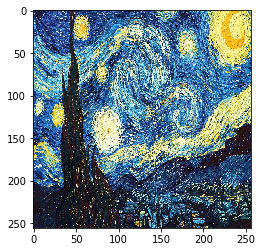

In [4]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image


style_img_path = 'datasets/styles/starry_night.jpg'
img = image.load_img(style_img_path, target_size=(256, 256))
plt.imshow(img)

In [ ]:
test_img_path = 'datasets/examples/tubingen.jpg'
img = image.load_img(test_img_path)
orig_img = image.img_to_array(img)
orig_img_4d = np.expand_dims(orig_img, axis=0)
orig_img_norm = preprocess_input(orig_img_4d)
pred_img = model.predict(orig_img_norm)
pred_img_restore = ((pred_img[-1] + 1) / 2 * 256).astype(np.uint8)
plt.imshow(pred_img_restore[0][..., ::-1])